In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

<h1>Hyperparameter Selection</h1>

In many of the aforementioned kernels, there were several paramters which must be set by the user - There is no explicitly correct value from the data or model.  In contrast with the parameters of the model, which we seek to optimize, the hyperparameters are taken as a given - but can have a large effect on the results.  Therefore careful selection of these are important to achieve practical results with SVMs (and other machine learning algorithms as well).

For instance, in a linear SVM, the parameter C which controls the misclassification cost must be specified by the user.  Intuitively a lower C will not penalize misclassified examples as strongly and may lead to a better generalization if there are outliers.

It get more complicated with other kernels, however.  Using a Gaussian Kernel, we now need to select C as well as $\sigma$.  The interaction of these hyperparameters is not always obvious.


Furthermore, we need to be aware of the potential for overfitting - especially for Gaussian kernels.  The Model parameters should be evaluated by scoring a validation set that is independent from the data used to fit the model

<h3>Grid Search</h3>
The simplest way to find a good value in one or two dimensions is a grid search.  At a user specified resolution, score the model at every cartesian product.  Though at a specified range and resolution the number of necessary evaluations increases -ummm- very quickly, it is also "embarassingly parallel."



For instance, selecting the best value of C for a linear SVM.  
Consider values of C in an exponential sequence,

$$C = \{2^{-20}, 2^{-19},...,2^{0},...,2^{20}\}$$ 



In [8]:
np.random.seed(2131231)
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
values = np.array([2**x for x in xrange(-20, 20, 1)])
scores = np.zeros_like(values)
X = load_iris()['data']
Y = load_iris()['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

for i, val in enumerate(values):
    clf = SVC(C=val, kernel="linear")
    clf.fit(X_train, Y_train)
    scores[i] = clf.score(X_test, Y_test)

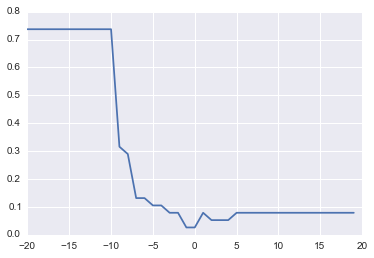

In [9]:
sns.set_style("darkgrid")
plt.plot(np.log2(values), 1 - scores)
plt.show()

<p>Above we can see that the missclassification rate on the validation set is equally low for values of C between $2^{-3}$ and $2^0$<p>

Now consider selection of the parameters $\gamma$ and C for a gaussian kernel ($\gamma = \frac{1}{2\sigma^2}$)

$$C = \{2^{-20}, 2^{-19},...,2^{0},...,2^{20}\}$$ 

$$\gamma = \{2^{-20}, 2^{-19},...,2^{0},...,2^{20}\}$$ 

In [10]:
values = np.array([2**x for x in xrange(-20, 20, 1)])
scores = np.zeros((len(values),len(values)))
X = load_iris()['data']
Y = load_iris()['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

for i, gamma in enumerate(values):
    for j, c in enumerate(values):
        clf = SVC(C=c, kernel="rbf", gamma=gamma)
        clf.fit(X_train, Y_train)
        scores[i][j] = clf.score(X_test, Y_test)

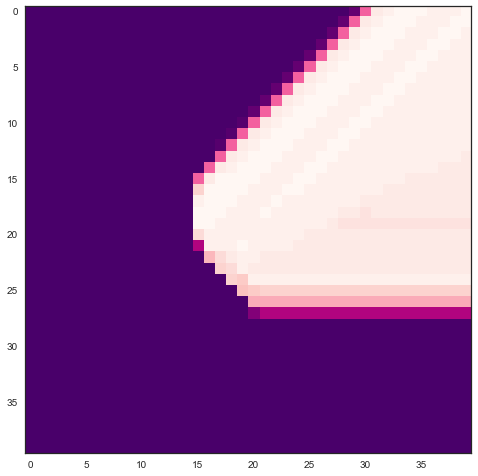

33

In [18]:
sns.set_style("white")
plt.figure(figsize=(8, 8))
plt.imshow(1 - scores, cmap="RdPu", interpolation="nearest")
plt.show()

Here we observe a general region with high accuracy - the pinkish area contains many close to optimal selections of the parameters $\gamma$ and $C$.  We could select $C = 15$ and $\gamma = 25$




We can generalize hyperparameter selection even further to include the choice of kernels!

$$kernel = \{Gaussian, Polynomial, Sigmoid\}$$

$$C = \{2^{-20}, 2^{-19},...,2^{0},...,2^{20}\}$$ 

$$Paramters=  \{ \gamma = \{2^{-20}, 2^{-19},...,2^{0},...,2^{20}\}, \\
d = \{1, 2,...,20\} \\
a = \{ 2^{-20}, 2^{-19},...,2^{0},...,2^{20}\} \ \ \}$$ 





In [46]:
c_values = np.array([2**x for x in xrange(-20, 20, 1)])
gamma_values  = np.array([2**x for x in xrange(-20, 20, 1)])
d_values = np.array([x for x in xrange(1, 10, 1)])
gaussian_scores = np.zeros((len(values),len(values)))
polynomial_scores = np.zeros((len(values),len(values)))
sigmoid_scores =  np.zeros((len(values), len(values)))
X = load_iris()['data']
Y = load_iris()['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

for i, g in enumerate(gamma_values):
    for j, c in enumerate(c_values):
        clf = SVC(C=c, kernel="rbf", gamma=g)
        clf.fit(X_train, Y_train)
        gaussian_scores[i][j] = clf.score(X_test, Y_test)
                          
for i, d in enumerate(d_values):
    for j, c in enumerate(c_values):
        clf = SVC(C=c, kernel="poly", degree=d)
        clf.fit(X_train, Y_train)
        polynomial_scores[i][j] = clf.score(X_test, Y_test)
                          
                          
for i, g in enumerate(gamma_values):
    for j, c in enumerate(c_values):
        clf = SVC(C=c, kernel="sigmoid",gamma=g)
        clf.fit(X_train, Y_train)
        sigmoid_scores[i][j] = clf.score(X_test, Y_test)

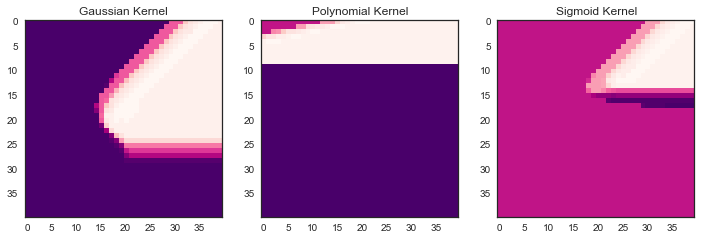

In [47]:
fig, ax = plt.subplots(1, 3)
sns.set_style("white")
fig.set_size_inches(12, 12)

ax[0].imshow(1 - gaussian_scores, cmap="RdPu", interpolation="nearest")
ax[0].set_title("Gaussian Kernel")
ax[1].imshow(1 - polynomial_scores, cmap="RdPu", interpolation="nearest")
ax[1].set_title("Polynomial Kernel")
ax[2].imshow(1 - sigmoid_scores, cmap="RdPu", interpolation="nearest")
ax[2].set_title("Sigmoid Kernel")
plt.show()

The above graphs show regions where the error is lowest - the lighter colors.  Note that C and the other parameters will interact - compensating for the changes in eachother.

see page 10 https://www.imt.liu.se/edu/courses/TBMI26/pdfs/SVM_HowTo.pdf

<h3></h3>